# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "?q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(1)
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kashgar
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | maun
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | igarka
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | saint albans
Processing Record 14 of Set 1 | undurkhaan
Processing Record 15 of Set 1 | kugesi
Processing Record 16 of Set 1 | el calafate
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | alburquerque
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | codringto

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,274.80,70,31,15.05,TF,1695942714
1,superior,46.7208,-92.1041,292.31,88,100,4.12,US,1695942716
2,bethel,41.3712,-73.4140,290.73,82,100,0.00,US,1695942717
3,port mathurin,-19.6833,63.4167,295.60,81,90,8.44,MU,1695942718
4,avarua,-21.2078,-159.7750,300.18,74,75,8.75,CK,1695942719


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.80,70,31,15.05,TF,1695942714
1,superior,46.7208,-92.1041,292.31,88,100,4.12,US,1695942716
2,bethel,41.3712,-73.4140,290.73,82,100,0.00,US,1695942717
3,port mathurin,-19.6833,63.4167,295.60,81,90,8.44,MU,1695942718
4,avarua,-21.2078,-159.7750,300.18,74,75,8.75,CK,1695942719


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

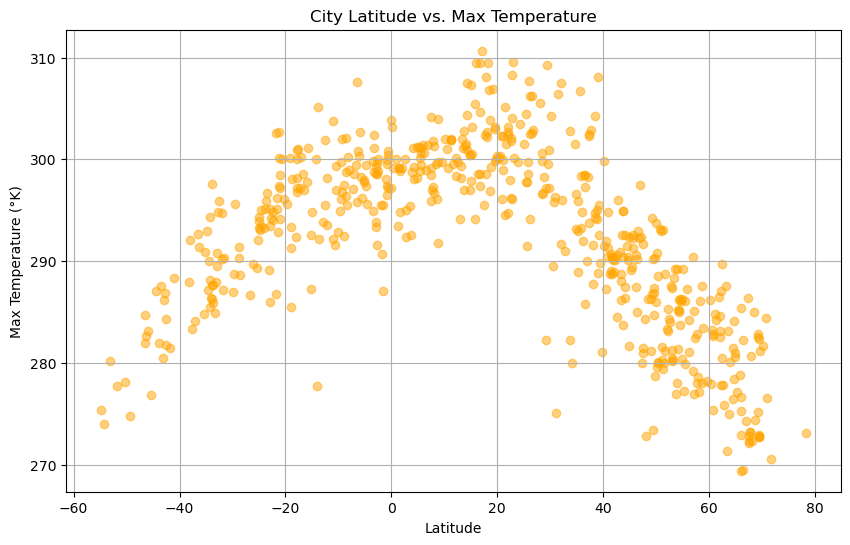

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='orange', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°K)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\marye\\OneDrive\\Desktop\\python-api-challenge\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

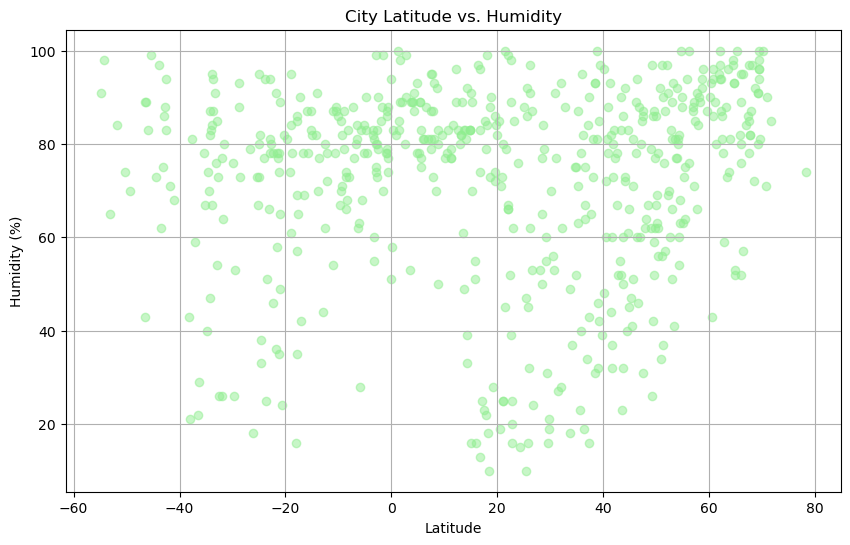

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='lightgreen', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\marye\\OneDrive\\Desktop\\python-api-challenge\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

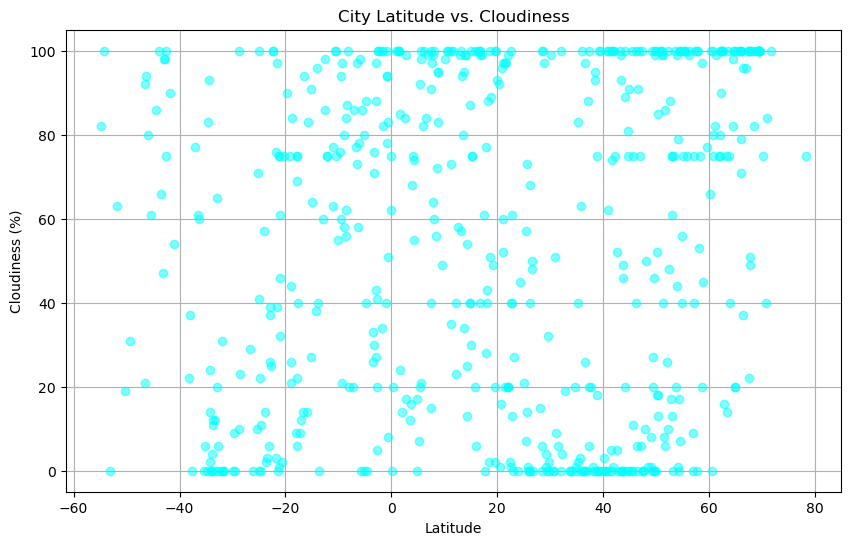

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='aqua', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\marye\\OneDrive\\Desktop\\python-api-challenge\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

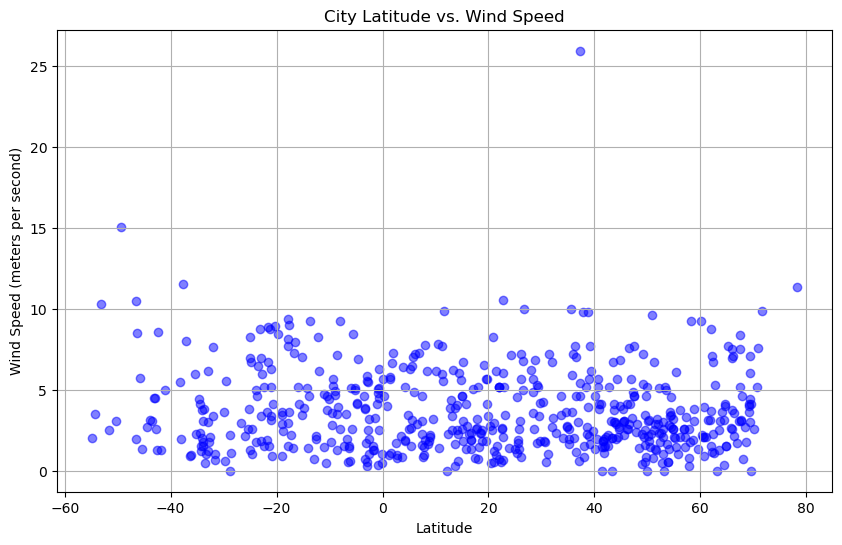

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='blue', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters per second)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\marye\\OneDrive\\Desktop\\python-api-challenge\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
#This is just some placeholder data
x = [1, 2, 3]
y = [2, 4, 5]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# # Define a function to create Linear Regression plots
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,superior,46.7208,-92.1041,292.31,88,100,4.12,US,1695942716
2,bethel,41.3712,-73.4140,290.73,82,100,0.00,US,1695942717
5,nova sintra,14.8667,-24.7167,296.99,83,87,5.63,CV,1695942720
6,saipan,15.1355,145.7010,300.54,89,75,6.69,MP,1695942722
7,bamboo flat,11.7000,92.7167,299.54,84,100,9.86,IN,1695942723


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.80,70,31,15.05,TF,1695942714
3,port mathurin,-19.6833,63.4167,295.60,81,90,8.44,MU,1695942718
4,avarua,-21.2078,-159.7750,300.18,74,75,8.75,CK,1695942719
9,blackmans bay,-43.0167,147.3167,286.22,86,98,4.52,AU,1695942725
10,puerto ayora,-0.7393,-90.3518,297.34,87,78,4.47,EC,1695942727


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
#Linear regression on Northern Hemisphere

#replace placeholder data
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = -0.39x + 306.33'

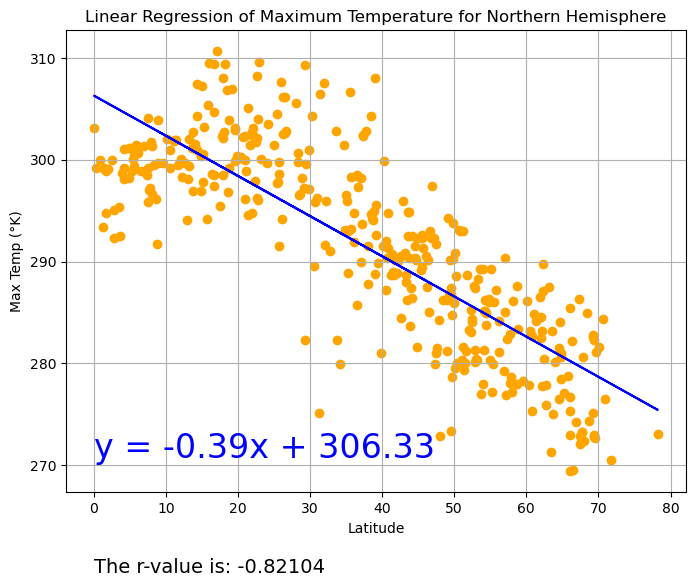

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='orange')
plt.plot(x, slope * x + intercept, color='blue')

plt.title('Linear Regression of Maximum Temperature for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°K)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-40), fontsize=24, color='blue')
plt.text(x.min(), y.min() - 10, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere

#replace placeholder data
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = 0.35x + 300.68'

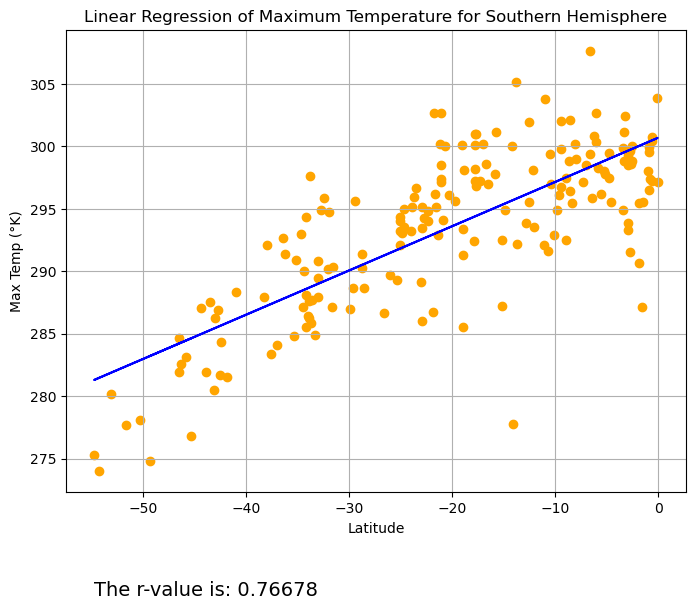

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='orange')
plt.plot(x, slope * x + intercept, color='blue')

plt.title('Linear Regression of Maximum Temperature for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°K)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-40), fontsize=24, color='blue')
plt.text(x.min(), y.min() - 10, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

**Discussion about the linear relationship:** The linear relationship expressed in these two scatter plots model temperature rises at a consistent rate as latitudes near the equator (latitude of 0) and accordant decrease at the same rate as latitude nears the north and south poles. Therefore, a city at a latitude of -50° should have an identitical (or at least very similar) maximum temperature to a city positioned at a latitude of 50°.

The linear regression equations are very nearly the perfect inverse of one another, suggesting that distance from equator is the predominant factor which determines city temperature. The variation among slope and y-intercept are trivial and can possibly be attributed to other factors excluding chance.

This tracks with the r-values for both equations, since at .7 and -0.8, they are quite close to 1 and -1, which would indicate perfect positive and negative linear relationships, repsectively.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = 0.14x + 66.45'

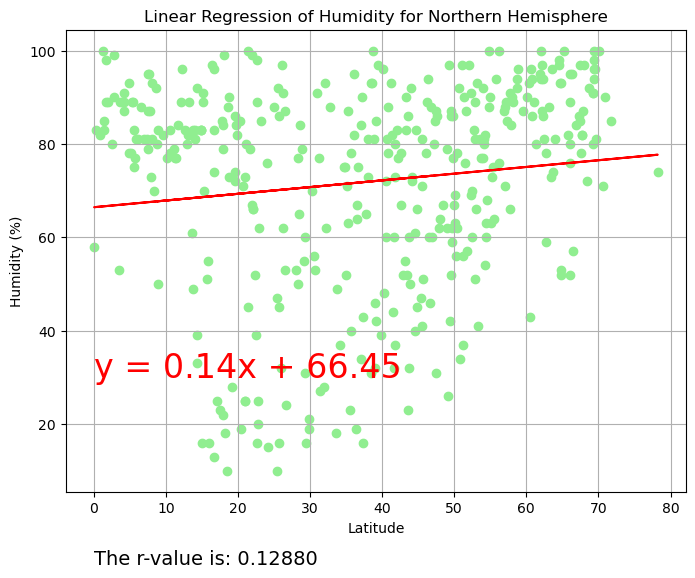

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='lightgreen')
plt.plot(x, slope * x + intercept, color='red')

plt.title('Linear Regression of Humidity for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-70), fontsize=24, color='red')
plt.text(x.min(), y.min() - 20, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

In [ ]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = 0.14x + 75.39'

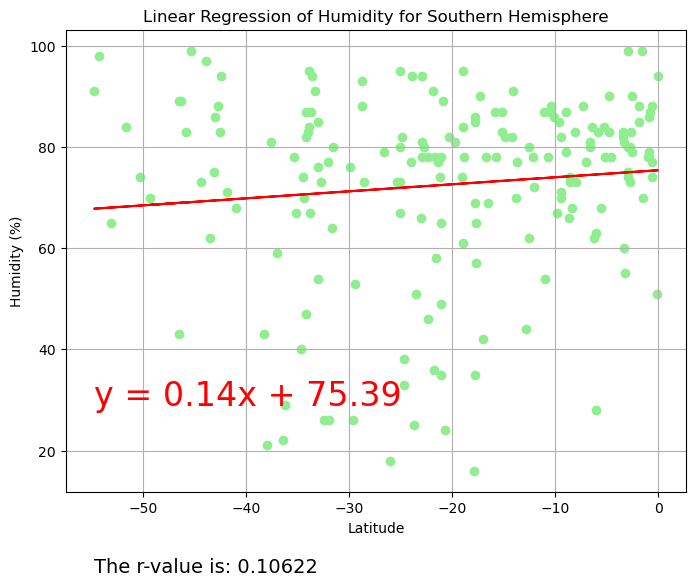

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='lightgreen')
plt.plot(x, slope * x + intercept, color='red')

plt.title('Linear Regression of Humidity for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-70), fontsize=24, color='red')
plt.text(x.min(), y.min() - 20, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

**Discussion about the linear relationship:** There appears to be no relationship between latitude and humidity levels. Future humidity levels cannot be accurately predicted when latitude respresents the independent variable of a linear regression model. Furthur research is warranted to determine a relationship between humidity and other city attributes.

The r-value, being close to zero for both equations, further suggests that there is no linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
#Northern Hemisphere

#replace placeholder data
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = 0.21x + 47.23'

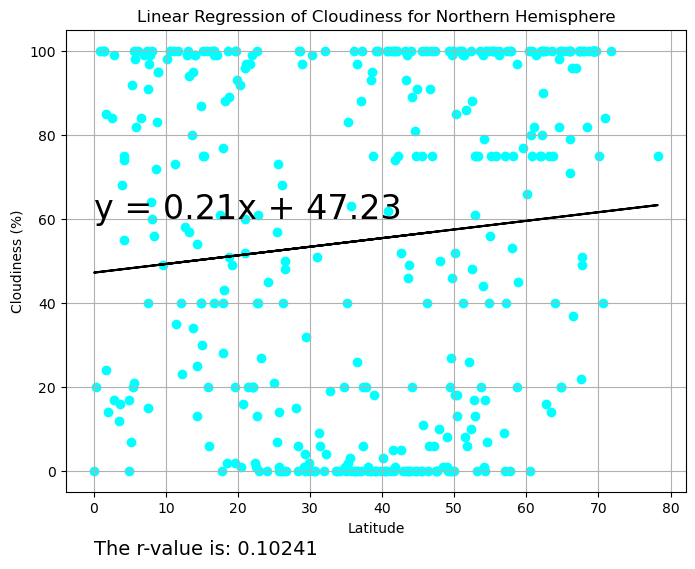

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='aqua')
plt.plot(x, slope * x + intercept, color='black')

plt.title('Linear Regression of Cloudiness for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-40), fontsize=24, color='black')
plt.text(x.min(), y.min() - 20, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

In [ ]:
# Southern Hemisphere

#replace placeholder data
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = 0.51x + 60.00'

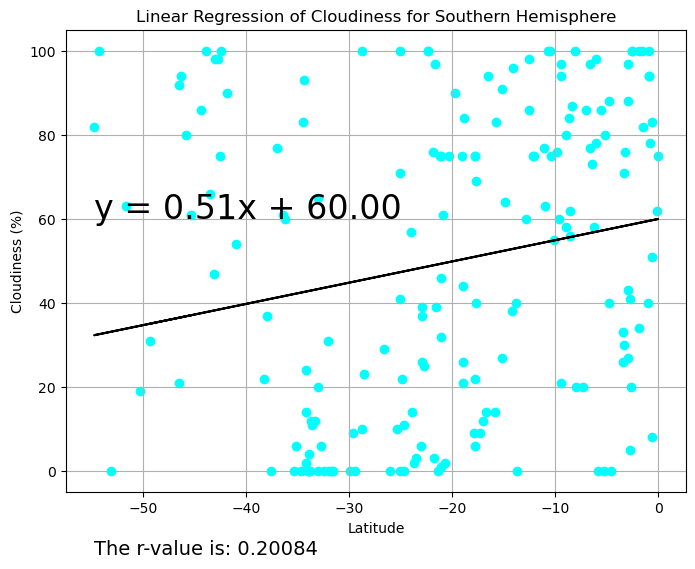

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='aqua')
plt.plot(x, slope * x + intercept, color='black')

plt.title('Linear Regression of Cloudiness for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-40), fontsize=24, color='black')
plt.text(x.min(), y.min() - 20, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

**Discussion about the linear relationship:** Just like humidity, there appears to be no relationship between latitude and cloud cover. The relationship is techinically less random, since the average of the r-values for cloudiness is approximately .07 and the average of the r-values for humiditiy is roughly .05. However, these are differences to the hundreth place, and in the grand scheme of things, the difference is negligible.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere

#replace placeholder data
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = -0.00x + 3.59'

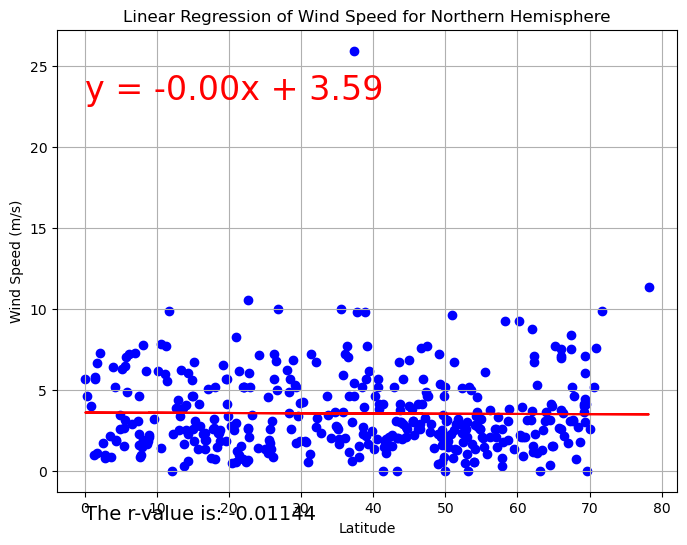

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, slope * x + intercept, color='red')

plt.title('Linear Regression of Wind Speed for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-3), fontsize=24, color='red')
plt.text(x.min(), y.min()-3, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

In [ ]:
# Southern Hemisphere

#replace placeholder data
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
linear_regression_equation = "y = {:.2f}x + {:.2f}".format(slope, intercept)

#double-check equation
linear_regression_equation

'y = -0.02x + 3.54'

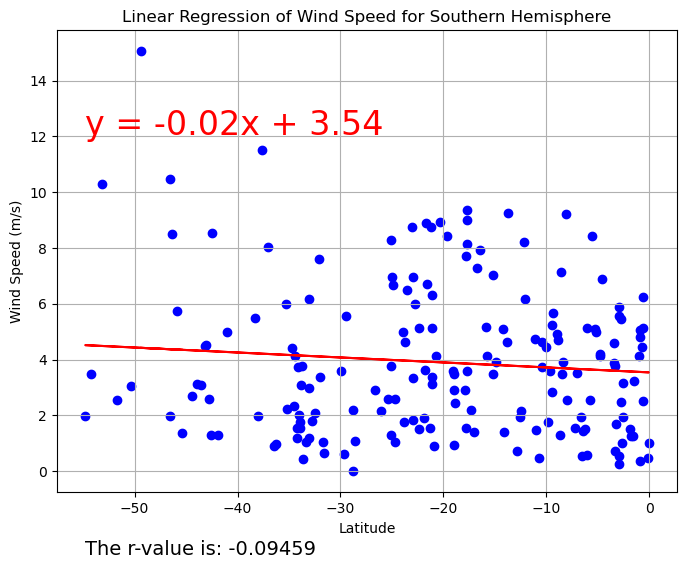

In [ ]:
#Plot the linear regression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, slope * x + intercept, color='red')

plt.title('Linear Regression of Wind Speed for Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.annotate(linear_regression_equation, (x.min(), y.max()-3), fontsize=24, color='red')
plt.text(x.min(), y.min()-3, f'The r-value is: {r_value:.5f}', fontsize=14, color='black')

plt.grid(True)
plt.show()

**Discussion about the linear relationship:** When observing both graphs, it appears as if there is a linear relationship between latitude and wind speed. The relationsihp appears to be positive in the northern hemisphere and negative in the southern. However, by looking at the r-values, we can see that this apparent relationship is an illusion. R-values of .19 and -.16 fall well below the parameters necessary to show a strong correlation (±.7-1.0). An r-value of less than ±.2 suggests a very weak, negligible, or nonexistant relationship.